Load all packages you need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample


Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
df = pd.read_csv('../data/diabetes_cleaned.csv')
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Create a scatterplot for the variables "Age" and "Pregnancies".

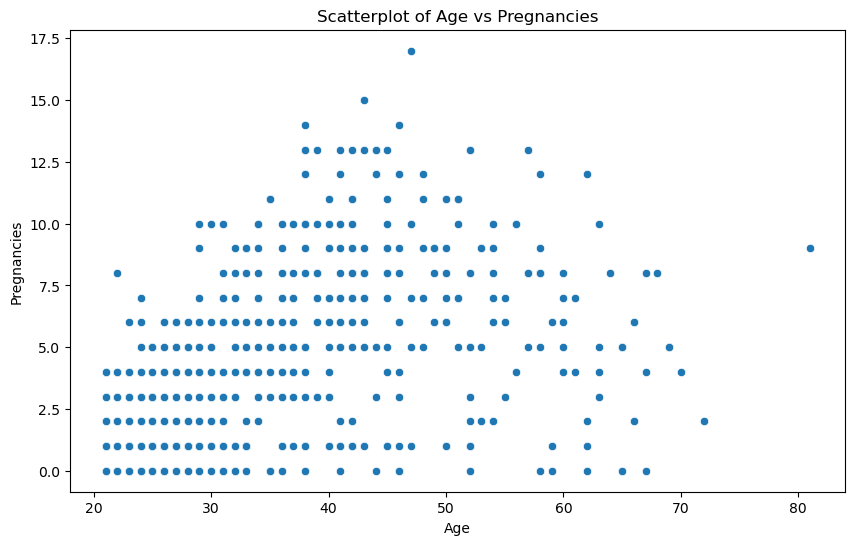

In [3]:
# Create a scatterplot for the variables "Age" and "Pregnancies"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', data=df)
plt.title('Scatterplot of Age vs Pregnancies')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

Let's see if we can find any useful clusters in this data. <br>
Clustering algorithms are affected by variance heterogenity between the variables (variables with smaller variance have larger influence).<br>
Inspect the histograms of both variables and apply an appropriate normalization method.<br> 

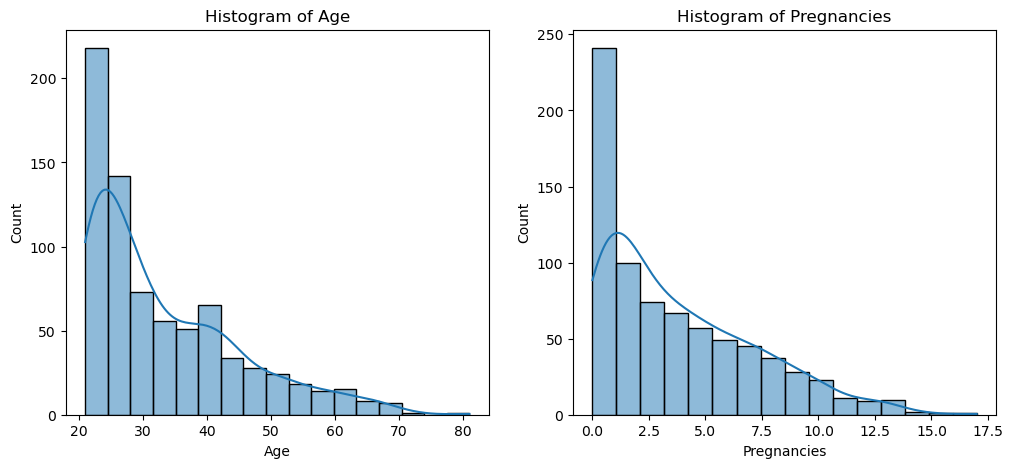

,Age_norm,Pregnancies_norm
0,1.423761,0.634746
1,-0.190645,-0.849868
2,-0.105676,1.228591
3,-1.040333,-0.849868
4,-0.275614,0.337823


In [4]:
from sklearn.preprocessing import StandardScaler

# Inspect the histograms of both variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Pregnancies'], kde=True)
plt.title('Histogram of Pregnancies')

plt.show()

# Normalize the data using z-score scaling
scaler = StandardScaler()
df[['Age_norm', 'Pregnancies_norm']] = scaler.fit_transform(df[['Age', 'Pregnancies']])

# Display the first few rows of the normalized dataframe
df[['Age_norm', 'Pregnancies_norm']].head()

Perform the K-Means clustering algorithm with k = [2,3,4,5] clusters. Use the elbow method to determine the optimal number of clusters.

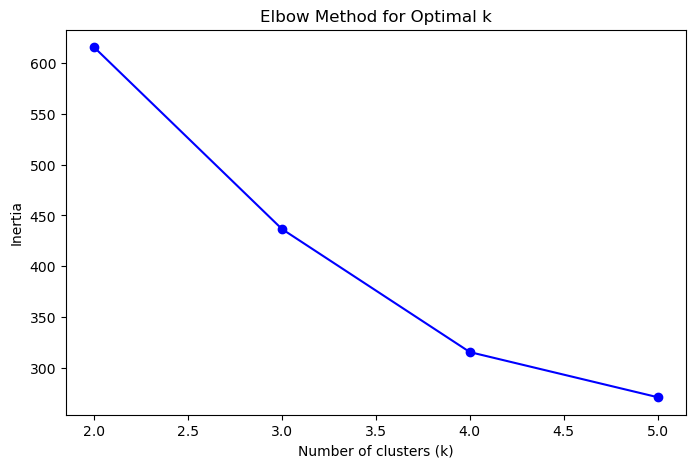

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering with k = [2, 3, 4, 5] clusters
k_values = [2, 3, 4, 5]
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age_norm', 'Pregnancies_norm']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Plot the optimal number of clusters on your scatterplot.

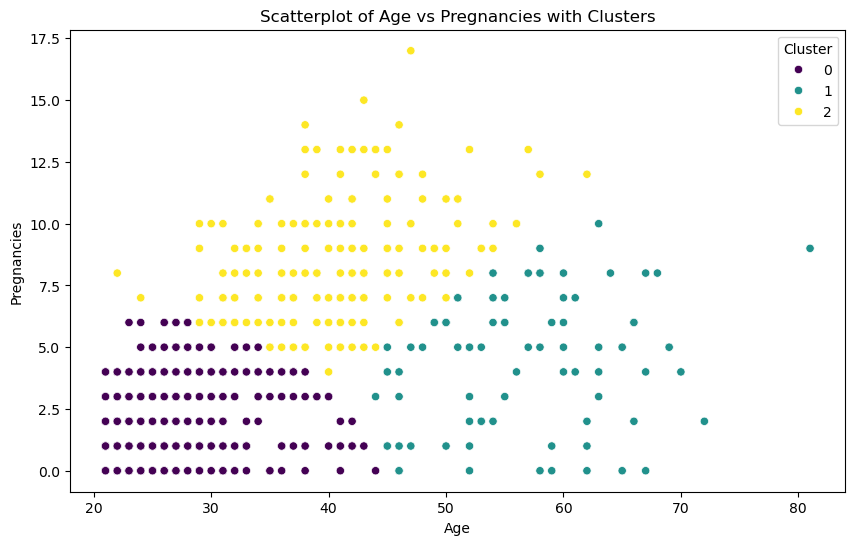

In [19]:

# Determine the optimal number of clusters (from the elbow plot)
optimal_k = 3  # Replace with the optimal number of clusters determined from the elbow plot

# Perform K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(df[['Age_norm', 'Pregnancies_norm']])

# Plot the scatterplot with the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Cluster', palette='viridis', data=df)
plt.title('Scatterplot of Age vs Pregnancies with Clusters')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.legend(title='Cluster')
plt.show()

#### Silhouette Score
Calculate the silhouette score to evaluate the quality of the clustering:

In [18]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df[['Age_norm', 'Pregnancies_norm']], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.38903562210485376


The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
The score ranges from -1 to 1:
A score close to 1 indicates that the data points are well-clustered and far from neighboring clusters.
A score close to 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
A negative score indicates that the data points might have been assigned to the wrong cluster.
A Silhouette Score of 0.54 suggests that the clusters are reasonably well-defined, but there might be some overlap or ambiguity between clusters.

#### Cluster Centroids
Inspect the cluster centroids to see if they are meaningful:

In [11]:
# Get the cluster centroids
centroids = kmeans_optimal.cluster_centers_
print('Cluster Centroids:')
print(centroids)

Cluster Centroids:
[[-0.58952126 -0.56467355]
 [ 2.00033471  0.19289676]
 [ 0.60806111  1.34423501]]


The centroids represent the center of each cluster in the normalized feature space.
Each row corresponds to a cluster, and each column corresponds to a feature (in this case, normalized "Age" and "Pregnancies").

Interpretation of Centroids:
Cluster 1:

Centroid: [-0.58952126, -0.56467355]
This cluster has lower values for both "Age" and "Pregnancies" compared to the mean of the dataset.
Cluster 2:

Centroid: [2.00033471, 0.19289676]
This cluster has significantly higher values for "Age" and slightly higher values for "Pregnancies" compared to the mean of the dataset.
Cluster 3:

Centroid: [0.60806111, 1.34423501]
This cluster has moderately higher values for "Age" and significantly higher values for "Pregnancies" compared to the mean of the dataset.